Линейная регрессия


Задача: на основе наблюдаемых точек построить прямую, которая отображает связь между двумя или более переменными

Регрессия пытается "подогнать" некоторую функцию к наблюдаемым данным, чтобы спрогнозировать новые данные

Линейная регрессия: подгоняем данные к прямой линии, пытаемся установить линейную связь между переменными и предсказать новые данные

In [1]:
import numpy as np
import random
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from numpy.linalg import inv, qr

(100, 1)
(100,)


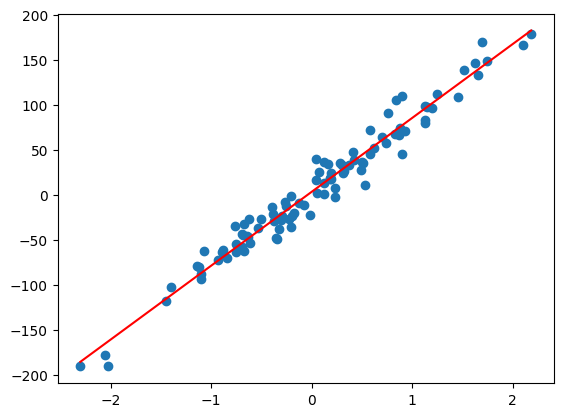

In [2]:
features, target = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1, noise=15, random_state=1)

print(features.shape)
print(target.shape)

model = LinearRegression().fit(features, target)

plt.scatter(features, target)

x = np.linspace(features.min(), features.max(), 100)

# y = kx + b
plt.plot(x, model.coef_[0] * x + model.intercept_, color='red')

Простая линейная регрессия

Линейная -> линейная зависимость 

Плюсы

+ прогнозирование на новых данных
+ анализ взаимного влияния переменных друг на друга 

Минусы

+ точки обучаемых данных НЕ будут точно лежать на прямой (шума) -> область погрешности
+ НЕ позволяет делать прогнозы ВНЕ диапазона имеющихся данных

Данные, на основании которых разрабатывается модель, - это выборка из совокупности (хотелось бы, чтоб была РЕПРЕЗЕНТАТИВНАЯ выборка)

In [3]:
data = np.array(
    [
        [1, 5],
        [2, 7],
        [3, 7],
        [4, 10],
        [5, 11],
        [6, 14],
        [7, 17],
        [8, 19],
        [9, 22],
        [10, 28]
    ]
)

x = data[:, 0]
y = data[:, 1]

n = len(x)


# Аналитический метод
w_1 = (n * sum(x[i] * y[i] for i in range(n)) - sum(x[i] for i in range(n)) * sum(y[i] for i in range(n))) / (n * sum(x[i] ** 2 for i in range(n)) - sum(x[i] for i in range(n)) ** 2)
w_0 = sum(y[i] for i in range(n)) / n - w_1 * sum(x[i] for i in range(n)) / n

print(w_1, w_0)


# Метод обратных матриц
x1 = np.vstack([x, np.ones(len(x))]).T
w = inv(x1.transpose() @ x1) @ (x1.transpose() @ y)

print(w)


# Разложение матриц
Q, R = qr(x1)
w = inv(R).dot(Q.transpose()).dot(y)

print(w)

2.4 0.8000000000000007
[2.4 0.8]
[2.4 0.8]


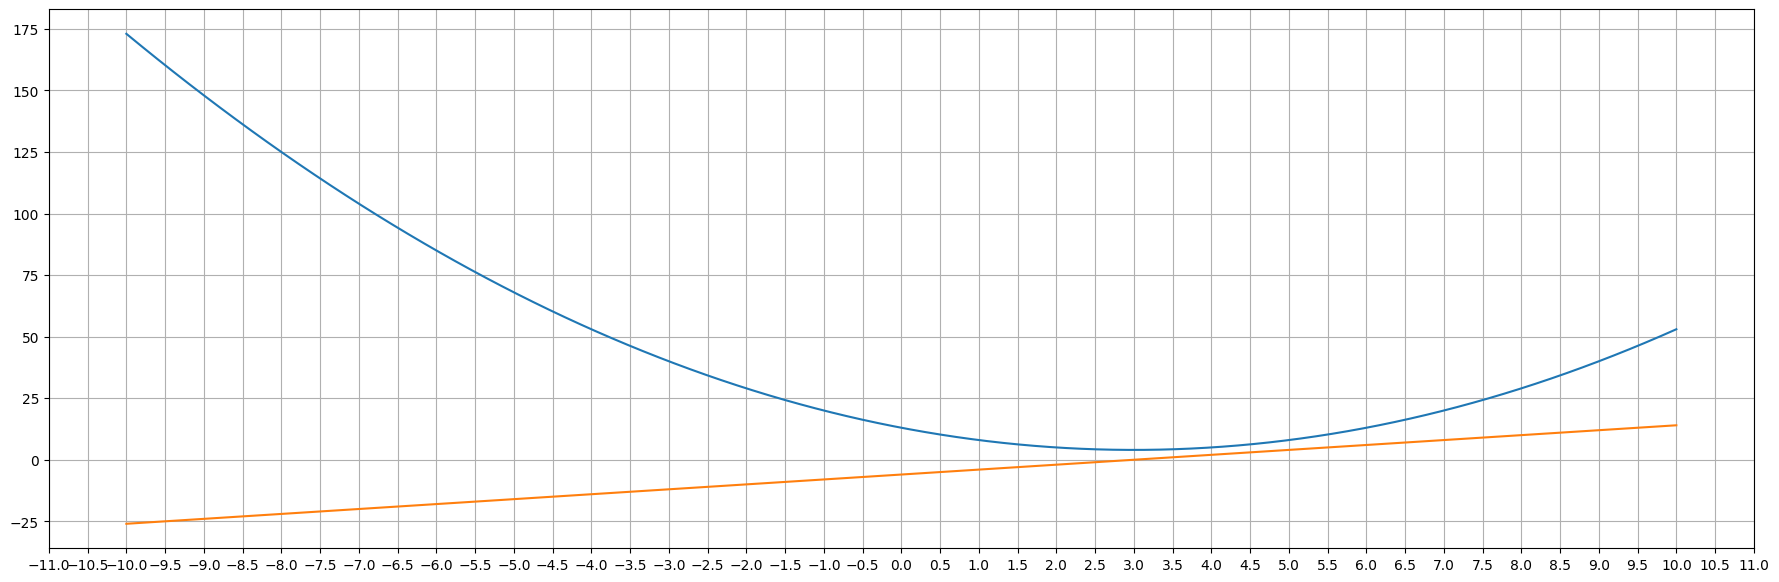

In [4]:
# Градиентный спуск
def f(x):
    return (x - 3) ** 2 + 4

def g(x):
    return 2 * x - 6

x = np.linspace(-10, 10, 100)
plt.figure(figsize=(22, 7))
ax = plt.gca()
ax.xaxis.set_major_locator(plt.MultipleLocator(0.5))
plt.plot(x, f(x))
plt.plot(x, g(x))
plt.grid()


In [5]:
L = 0.001
iterations = 100_000
x = random.randint(0, 5)

for i in range(iterations):
    dx = g(x)
    x -= L * dx

print(x, f(x))

2.999999999999889 4.0


In [6]:
data = np.array(
    [
        [1, 5],
        [2, 7],
        [3, 7],
        [4, 10],
        [5, 11],
        [6, 14],
        [7, 17],
        [8, 19],
        [9, 22],
        [10, 28]
    ]
)

x = data[:, 0]
y = data[:, 1]

n = len(x)

w1 = 0.0
w0 = 0.0

L = 0.001
iterations = 100_000

for i in range(iterations):
    Dw0 = 2 * sum((-y[i] + w0 + w1 * x[i]) for i in range(n))
    Dw1 = 2 * sum((x[i] * (-y[i] + w0 + w1 * x[i])) for i in range(n))
    w0 -= L * Dw0
    w1 -= L * Dw1

print(w1, w0)

2.4000000000000026 0.7999999999999835


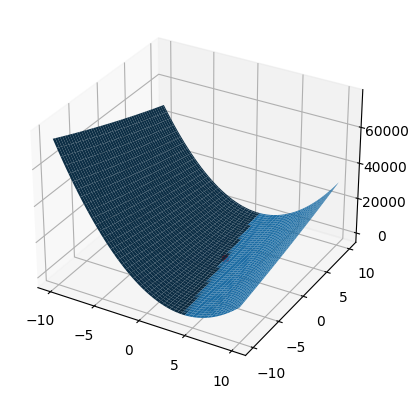

In [7]:
data = np.array(
    [
        [1, 5],
        [2, 7],
        [3, 7],
        [4, 10],
        [5, 11],
        [6, 14],
        [7, 17],
        [8, 19],
        [9, 22],
        [10, 28]
    ]
)

x = data[:, 0]
y = data[:, 1]

n = len(x)

w1 = np.linspace(-10, 10, 100)
w0 = np.linspace(-10, 10, 100)

def E(w1, w0, x, y):
    return sum((y[i] - (w0 + w1 * x[i])) ** 2 for i in range(len(x)))

W1, W0 = np.meshgrid(w1, w0)
EW = E(W1, W0, x, y)

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot_surface(W1, W0, EW)

w1_fit = 2.4
w0_fit = 0.8

E_fit = E(w1_fit, w0_fit, x, y)

ax.scatter3D(w1_fit, w0_fit, E_fit, color='red')